#1. 분산분석

1. 분산분석과 다중비교

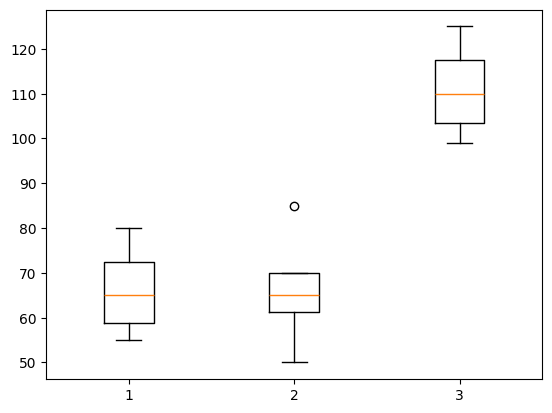

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1 = [60, 70, 80, 55]
group2 = [50, 65, 85, 65]
group3 = [105, 115, 99, 125]
plot_data = [group1, group2, group3]

ax = plt.boxplot(plot_data)
plt.show()


In [2]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=np.float64(17.419898513954344), pvalue=np.float64(0.0008047905831477702))

In [3]:
values = group1 + group2 + group3
group = [1,1,1,1,2,2,2,2,3,3,3,3]

tukey = pairwise_tukeyhsd(endog=values,     # Data
                          groups=group,   # Groups
                          alpha=0.05)          # Significance level
tukey.summary()              # See test summary


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.0,1.0,-24.4422,24.4422,False
1,3,44.75,0.0016,20.3078,69.1922,True
2,3,44.75,0.0016,20.3078,69.1922,True


- 분산 분석 응용

In [4]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/ws-l/hh2025/main/data/voter1.csv')

In [5]:
data.head()

,age,category
0,51,B
1,49,E
2,51,C
3,48,E
4,56,A


In [6]:
A = data.query("category=='A'")
B = data.query("category=='B'")
C = data.query("category=='C'")
D = data.query("category=='D'")
E = data.query("category=='E'")

In [7]:
# ANOVA
stats.f_oneway(A.age, B.age, C.age, D.age, E.age)

F_onewayResult(statistic=np.float64(1.7744689357329695), pvalue=np.float64(0.13173183201930463))

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data.age,     # Data
                          groups=data.category,   # Groups
                          alpha=0.05)          # Significance level

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-1.3353,0.5848,-3.8242,1.1535,False
A,C,-0.7593,0.9062,-3.1315,1.6129,False
A,D,-0.0264,1.0,-3.0202,2.9674,False
A,E,-1.4184,0.4319,-3.6932,0.8564,False
B,C,0.576,0.8362,-0.9362,2.0882,False
B,D,1.309,0.5571,-1.0622,3.6801,False
B,E,-0.0831,0.9998,-1.4374,1.2713,False
C,D,0.733,0.9003,-1.5154,2.9813,False
C,E,-0.6591,0.4976,-1.7847,0.4665,False
D,E,-1.392,0.3899,-3.5374,0.7533,False


In [ ]:
#week1.csv 읽으셔서
#datetime- >일별정보
#passorfail에서 1로 필터링
#모든 수치형 변수에 대해서 월별로 평균차이가 있는지 분산분석하세요.


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ws-l/hh2025/main/data/week1.csv")
data["day"] = pd.to_datetime(data.ReceivedDateTime).dt.day
data = data.query("passorfail==1")
A = data.query("day==23")
B = data.query("day==24")
C = data.query("day==25")
for i in data.columns[2:42]:
  print( stats.f_oneway( A[i].values, B[i].values, C[i].values) )

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/ws-l/hh2025/main/data/creditset2.csv")
def func1(x):
  if x<30:
    return("<30")
  elif x<45:
    return("<45")
  else:
    return("45<=")
data["cat"] = data.age.apply(func1)
A = data.query("cat=='<30'")
B = data.query("cat=='<45'")
C = data.query("cat=='45<='")
stats.f_oneway(A.loan, B.loan, C.loan)
tukey = pairwise_tukeyhsd(endog=data.loan, groups=data.cat, alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
45<=,<30,-19.3868,0.9927,-413.3751,374.6015,False
45<=,<45,-221.1453,0.356,-599.2837,156.9931,False
<30,<45,-201.7585,0.4969,-621.3035,217.7865,False


- 이원 분산분석

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

# diamonds 데이터셋 불러오기
df = sm.datasets.get_rdataset("diamonds", "ggplot2").data

# 데이터 확인
print(df.head())
print(df['cut'].value_counts())

   carat      cut color clarity  depth  table  price    x    y    z
0   0.23    Ideal     E     SI2  61.50  55.00    326 3.95 3.98 2.43
1   0.21  Premium     E     SI1  59.80  61.00    326 3.89 3.84 2.31
2   0.23     Good     E     VS1  56.90  65.00    327 4.05 4.07 2.31
3   0.29  Premium     I     VS2  62.40  58.00    334 4.20 4.23 2.63
4   0.31     Good     J     SI2  63.30  58.00    335 4.34 4.35 2.75
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


In [ ]:
df.head()

In [35]:
# 모델 적합: 두 요인과 상호작용 포함
model = smf.ols('price ~ cut + clarity', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
#print(model.summary())
print(anova_table)

                     sum_sq        df      F  PR(>F)
cut        6,643,753,803.26      4.00 108.11    0.00
clarity   18,909,811,326.11      7.00 175.83    0.00
Residual 828,521,578,832.63 53,928.00    NaN     NaN


#2. 실습
- 4:48까지 해보세요~

- https://www.kamp-ai.kr/aidataList의 CNC 데이터 혹은 github의 Dataset_CNC를 다운로드
- 원본 데이터의 실험별 csv를 하나의 데이터프레임으로 읽기:
 - pd.concat( [ 데이터프레임1, 데이터프레임2], ignore_index=True  )
- 실험차수별로 y_output에 대한 일원분산분석 + 해석
- 실험차수별+단계별 y_output에 대한 이원분산분석 +해석


In [ ]:
!wget https://raw.githubusercontent.com/ws-l/hh2025/main/data/Dataset_CNC.zip

In [ ]:
!unzip Dataset_CNC.zip

In [ ]:
import os
files = os.listdir("dataset/1/2")
result=pd.DataFrame()
for i in files:
  tmpdf = pd.read_csv("dataset/1/2/"+i)
  tmpdf["exp"]=i.split(".")[0]
  result = pd.concat([result, tmpdf], ignore_index=True)